# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**IMPORTANT NOTICE: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Always verify the findings through additional analysis.**

## Overview of the Dandiset

This notebook explores [Dandiset 001375](https://dandiarchive.org/dandiset/001375), a pilot study investigating the effects of disrupting septal GABAergic activity using DREADDs (Designer Receptors Exclusively Activated by Designer Drugs) on hippocampal and neocortical activity. 

The dataset was contributed by researchers including Michael Eckert, Bruce McNaughton, and Janina Ferbinteanu. It includes electrophysiological recordings from mice running laps in a virtual hallway. The study aims to understand how manipulation of the septum (a structure important for generating theta rhythms) affects neural activity in connected brain regions.

## What this notebook covers

In this notebook, we will:

1. Connect to the DANDI archive and explore the Dandiset metadata
2. Examine the structure and content of the NWB (Neurodata Without Borders) files
3. Explore trial structure and behavioral data
4. Analyze neural activity patterns (spike trains and field potentials)
5. Visualize key aspects of the electrophysiological data

By the end of this notebook, you should have a solid understanding of the dataset and how to work with it for your research.

## Required packages

The following Python packages are required to run this notebook:

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient

# Set up some visualization preferences
sns.set_theme() # Use seaborn styling for plots
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

## Connecting to the DANDI Archive

First, let's connect to the DANDI archive and get basic information about the Dandiset.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")

# Handle contributors which might be strings or dictionaries
contributors = metadata.get('contributor', [])
if contributors and isinstance(contributors[0], dict):
    contributor_names = [c.get('name', str(c)) for c in contributors if isinstance(c, dict)]
    print(f"Contributors: {', '.join(contributor_names)}")
else:
    print(f"Contributors: {', '.join(str(c) for c in contributors)}")

# Handle variables measured which might be strings or dictionaries
variables = metadata.get('variableMeasured', [])
if variables and isinstance(variables[0], dict):
    variable_names = [v.get('name', str(v)) for v in variables if isinstance(v, dict)]
    print(f"Variables measured: {', '.join(variable_names)}")
else:
    print(f"Variables measured: {', '.join(str(v) for v in variables)}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
Description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
Contributors: Eckert, Michael, NIH Brain, McNaughton, Bruce, Ferbinteanu, Janina
Variables measured: 


## Exploring Dandiset Assets

Now let's list the assets (NWB files) available in this Dandiset.

In [3]:
# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nAsset details:")
for i, asset in enumerate(assets):
    print(f"Asset {i+1}:")
    print(f"- Path: {asset.path}")
    print(f"- ID: {asset.identifier}")
    print(f"- Size: {asset.size / (1024*1024*1024):.2f} GB")


Found 3 assets in the dataset

Asset details:
Asset 1:
- Path: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
- ID: ce525828-8534-4b56-9e47-d2a34d1aa897
- Size: 51.20 GB
Asset 2:
- Path: sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
- ID: 376dc673-611b-4521-b135-9ec01c7f4f74
- Size: 64.68 GB
Asset 3:
- Path: sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb
- ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16
- Size: 65.00 GB


We see that the Dandiset contains three NWB files from two subjects (MS13B and MS14A), with MS14A having two recordings with different objects.

For this demonstration, we'll focus on analyzing the first file from subject MS13B.

In [4]:
# Get the first asset
asset = assets[0]
print(f"Selected asset: {asset.path}")
print(f"Asset ID: {asset.identifier}")

# Create the URL for the asset
asset_url = f"https://api.dandiarchive.org/api/assets/{asset.identifier}/download/"
print(f"Asset URL: {asset_url}")

# Also create a URL for neurosift visualization
neurosift_url = f"https://neurosift.app/nwb?url={asset_url}&dandisetId=001375&dandisetVersion=draft"
print(f"View this file on Neurosift: {neurosift_url}")

Selected asset: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
Asset ID: ce525828-8534-4b56-9e47-d2a34d1aa897
Asset URL: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/
View this file on Neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft


## Loading and Exploring the NWB File

Now let's load the NWB file and explore its contents to understand the data structure.

In [5]:
# Load the NWB file
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display basic metadata
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: mouse running laps in virtual hallway
Identifier: MS13B
Session start time: 2024-07-25 19:00:00-07:00


### Subject Information

Let's examine information about the subject:

In [6]:
# Print subject information
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Species: {subject.species}")
print(f"Age: {subject.age}")
print(f"Sex: {subject.sex}")
print(f"Description: {subject.description}")

Subject ID: MS13B
Species: Mus musculus
Age: P90D
Sex: M
Description: medial septum DREADD to suppress GABA interneurons


### Electrode Information

Now let's look at the recording setup:

In [7]:
# Print electrode group information
print("Electrode Groups:")
for group_name, group in nwb.electrode_groups.items():
    print(f"Group: {group_name}")
    print(f"  Description: {group.description}")
    print(f"  Location: {group.location}")
    print(f"  Device description: {group.device.description}")
    print(f"  Device manufacturer: {group.device.manufacturer}")

# Get information about the electrodes
electrodes_df = nwb.electrodes.to_dataframe()
print(f"\nTotal number of electrodes: {len(electrodes_df)}")

# Display the first few electrodes
print("\nSample of electrode information:")
display(electrodes_df.head())

# Count electrodes by group
group_counts = electrodes_df['group_name'].value_counts()
print("\nElectrode group distribution:")
for group, count in group_counts.items():
    print(f"  {group}: {count} electrodes")

Electrode Groups:
Group: shank1
  Description: shank1, electrodes
  Location: ventral hippocampus, visual cortex
  Device description: 128 ch silicon probe
  Device manufacturer: UCLA
Group: shank2
  Description: shank2, electrodes
  Location: ventral hippocampus, visual cortex
  Device description: 128 ch silicon probe
  Device manufacturer: UCLA

Total number of electrodes: 256

Sample of electrode information:


,x,y,location,filtering,group,group_name,label
id,,,,,,,
0,20.0,1375.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14052...,shank1,shank1-electrode001
1,20.0,1325.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14052...,shank1,shank1-electrode002
2,20.0,1275.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14052...,shank1,shank1-electrode003
3,20.0,1225.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14052...,shank1,shank1-electrode004
4,20.0,1175.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14052...,shank1,shank1-electrode005



Electrode group distribution:
  shank1: 128 electrodes
  shank2: 128 electrodes


We see that recording was done using a 256-channel setup with two silicon probe shanks (128 channels each). One shank was placed in the ventral hippocampus and visual cortex.

### Trial Information

Now let's look at the structure of trials in the experiment:

Number of trials: 387

First 5 trials:


,start_time,stop_time
id,,
0,4.323800,16.929833
1,16.963067,28.414333
2,28.447100,39.402833
3,39.435833,50.027033
4,50.059667,63.064467



Descriptive statistics of trial durations (seconds):


count    387.000000
mean      12.300654
std        8.968260
min        7.656600
25%        9.964817
50%       10.857600
75%       12.095133
max      164.306967
Name: duration, dtype: float64

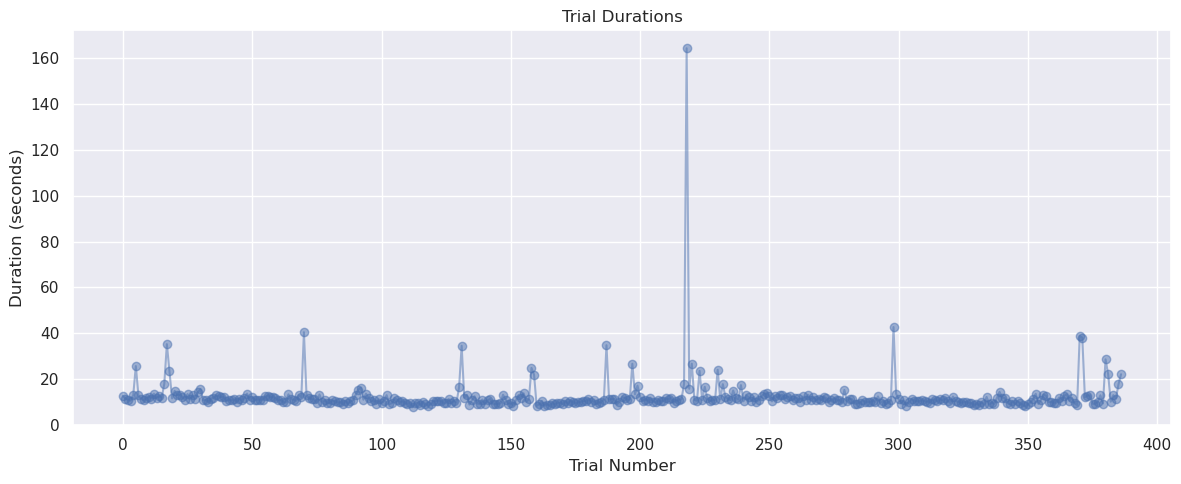

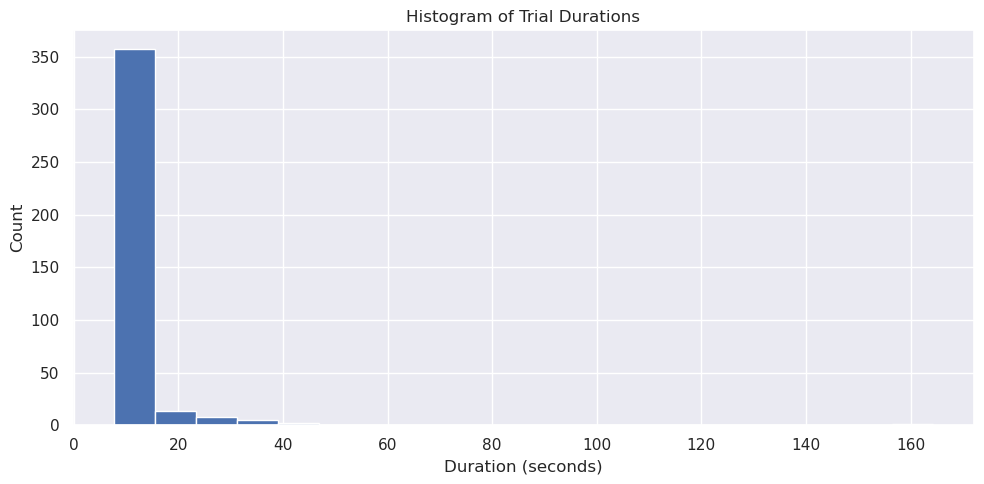

In [8]:
# Get trial information
trials_df = nwb.trials.to_dataframe()
print(f"Number of trials: {len(trials_df)}")

# Display first few trials
print("\nFirst 5 trials:")
display(trials_df.head())

# Calculate trial durations
trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']

# Display statistics about trial durations
print("\nDescriptive statistics of trial durations (seconds):")
display(trials_df['duration'].describe())

# Plot trial durations
plt.figure(figsize=(12, 5))
plt.plot(trials_df.index, trials_df['duration'], '-o', alpha=0.5)
plt.xlabel('Trial Number')
plt.ylabel('Duration (seconds)')
plt.title('Trial Durations')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot trial duration histogram
plt.figure(figsize=(10, 5))
plt.hist(trials_df['duration'], bins=20)
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Histogram of Trial Durations')
plt.grid(True)
plt.tight_layout()
plt.show()

We observe that most trials lasted between 7-12 seconds, with a mean duration of about 12.3 seconds. There are some longer trials, including a notable outlier around 164 seconds. This suggests that the mice typically completed their laps in a consistent amount of time, with occasional delays.

### Neural Activity: Spike Trains

Next, let's explore the neural units (single neurons) recorded in the dataset:

In [9]:
# Get units information
units_df = nwb.units.to_dataframe()
print(f"Number of units: {len(units_df)}")

# Display first few units
print("\nFirst 5 units:")
display(units_df.head())

Number of units: 33

First 5 units:


,spike_times
id,
1,"[3.5485, 3.5543666666666667, 3.784666666666667..."
2,"[0.1826, 0.21976666666666667, 0.77823333333333..."
3,"[0.005533333333333334, 0.01633333333333333, 0...."
4,"[0.5452333333333333, 0.5632, 0.572833333333333..."
5,"[0.07036666666666666, 0.1002, 0.17066666666666..."


Let's calculate and visualize the firing rates for the different units:

Session duration: 4780.24 seconds


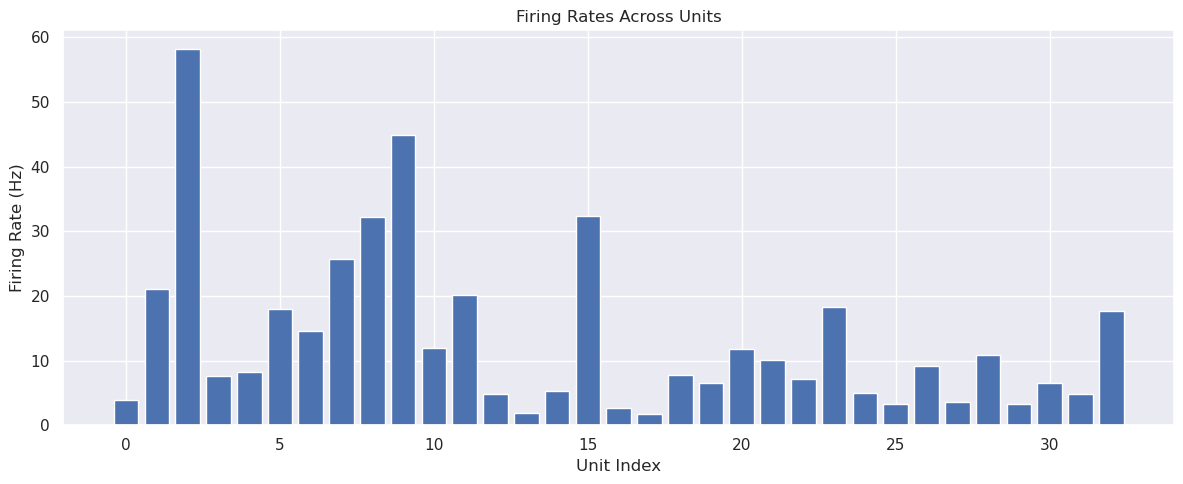

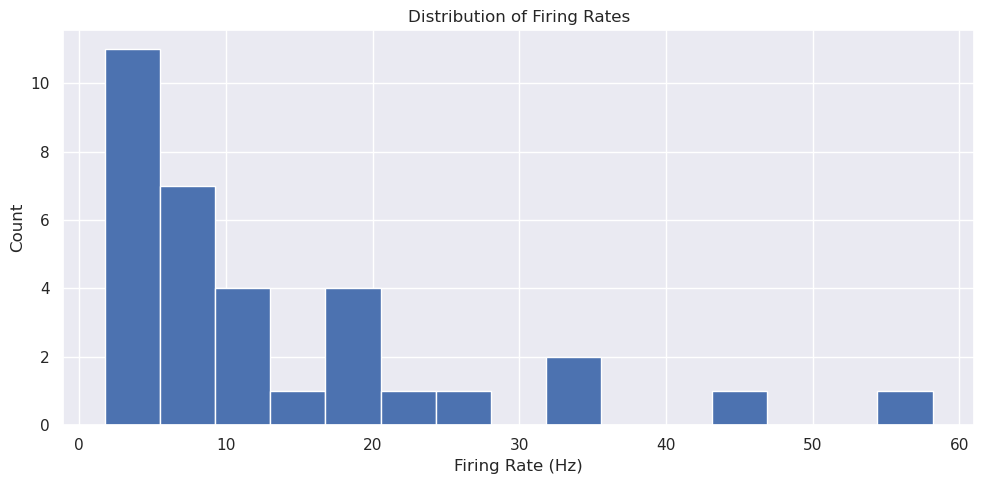


Units with highest firing rates:


,unit_id,firing_rate
2,3,58.168861
9,10,44.940440
15,16,32.293999
8,9,32.255298
7,8,25.726753


In [10]:
# Calculate firing rates for each unit
firing_rates = []
unit_ids = []

start_time = 0
end_time = trials_df['stop_time'].max()  # Using last trial's end as session duration
print(f"Session duration: {end_time:.2f} seconds")

for i, unit_id in enumerate(nwb.units.id[:]):
    spike_times = np.array(nwb.units['spike_times'][i])
    
    # Calculate overall firing rate
    rate = len(spike_times) / (end_time - start_time)
    
    firing_rates.append(rate)
    unit_ids.append(unit_id)

# Create a dataframe of units with their firing rates
unit_rates_df = pd.DataFrame({'unit_id': unit_ids, 'firing_rate': firing_rates})
unit_rates_df = unit_rates_df.sort_values('unit_id')

# Plot firing rate distribution
plt.figure(figsize=(12, 5))
plt.bar(range(len(firing_rates)), firing_rates)
plt.xlabel('Unit Index')
plt.ylabel('Firing Rate (Hz)')
plt.title('Firing Rates Across Units')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot firing rate histogram
plt.figure(figsize=(10, 5))
plt.hist(firing_rates, bins=15)
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Count')
plt.title('Distribution of Firing Rates')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the units with highest firing rates
top_units = unit_rates_df.sort_values('firing_rate', ascending=False).head(5)
print("\nUnits with highest firing rates:")
display(top_units)

The units show a wide range of firing rates, from very low (<5 Hz) to high (>50 Hz). This variation in firing rates is typical of neural recordings and suggests a diverse population of neurons with different functional properties.

Let's visualize spike trains for some of the units:

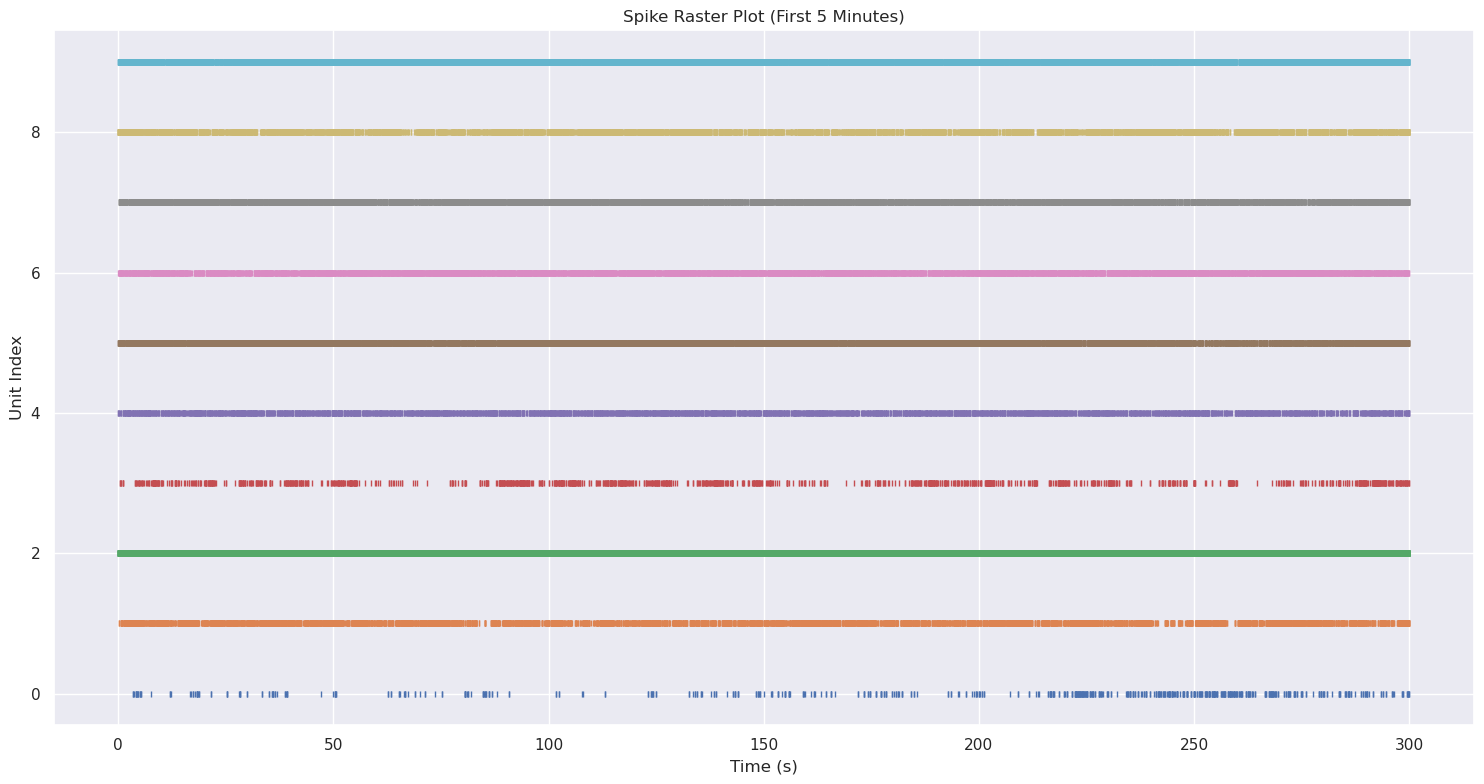

In [11]:
# Plot spike raster for first few units
plt.figure(figsize=(15, 8))

# Select a subset of units to display
num_units_to_plot = min(10, len(nwb.units.id[:]))
# Select a time window (first 5 minutes)
time_window = 300  # seconds

# Create the plot
for i in range(num_units_to_plot):
    spike_times = np.array(nwb.units['spike_times'][i])
    
    # Limit to time window
    mask = spike_times < time_window
    spike_times_subset = spike_times[mask]
    
    # Plot spike raster
    plt.plot(spike_times_subset, np.ones_like(spike_times_subset) * i, '|', markersize=4)

plt.xlabel('Time (s)')
plt.ylabel('Unit Index')
plt.title('Spike Raster Plot (First 5 Minutes)')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

The raster plot shows the firing patterns of different units over time. We can see considerable variation in activity patterns across units, with some firing more regularly and others showing sparser activity.

### Analyzing Raw Electrophysiology Data

Now let's examine the raw electrophysiological recordings:

In [12]:
# Get information about time series data
time_series = nwb.acquisition["time_series"]
print(f"Sampling rate: {time_series.rate} Hz")
print(f"Unit: {time_series.unit}")
print(f"Data shape: {time_series.data.shape}")
print(f"Data type: {time_series.data.dtype}")

# Calculate recording duration
duration_samples = time_series.data.shape[0]
duration_seconds = duration_samples / time_series.rate
duration_minutes = duration_seconds / 60
print(f"Recording duration: {duration_seconds:.2f} seconds ({duration_minutes:.2f} minutes)")

Sampling rate: 30000.0 Hz
Unit: mV
Data shape: (144675584, 256)
Data type: int16
Recording duration: 4822.52 seconds (80.38 minutes)


Let's visualize a small segment of the raw data from a few channels:

Loading 30000 samples from selected channels...


Loaded data shape: (30000, 5)


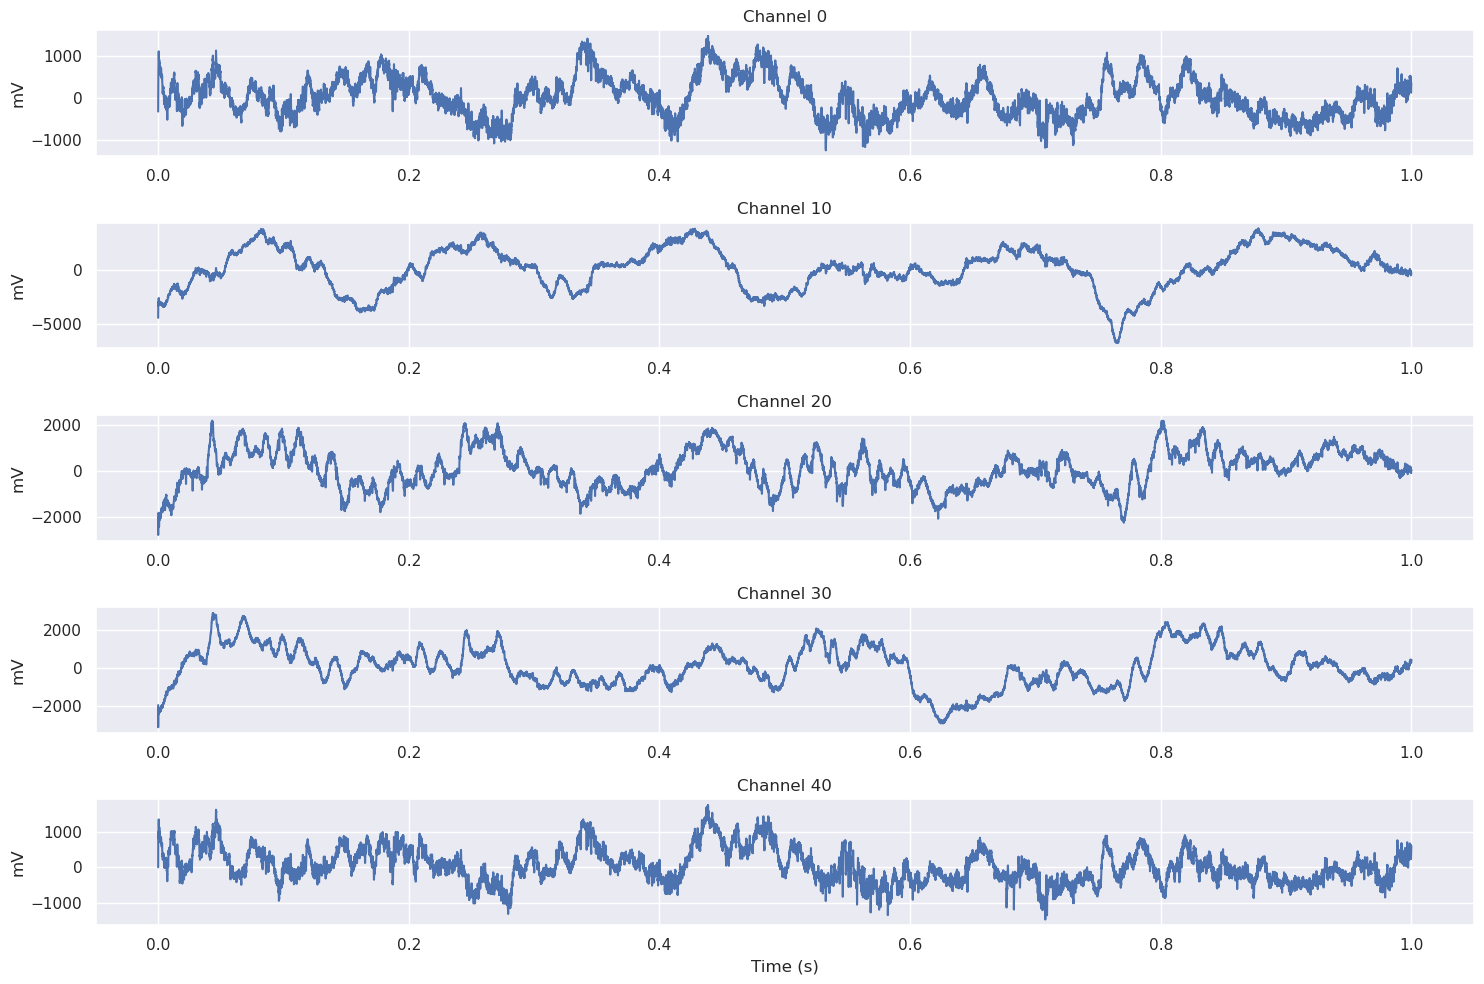

In [13]:
# Sample a small segment of data for visualization (first 30,000 samples = 1 second)
# And use a few channels to avoid loading too much data
sample_time = 1.0  # seconds
num_samples = int(sample_time * time_series.rate)
selected_channels = [0, 10, 20, 30, 40]  # Select specific channels to examine

print(f"Loading {num_samples} samples from selected channels...")
raw_data_sample = time_series.data[:num_samples, selected_channels]
print(f"Loaded data shape: {raw_data_sample.shape}")

# Create a time vector
time_vector = np.arange(num_samples) / time_series.rate

# Plot the channels
plt.figure(figsize=(15, 10))
for i, channel in enumerate(selected_channels):
    plt.subplot(len(selected_channels), 1, i+1)
    plt.plot(time_vector, raw_data_sample[:, i])
    plt.title(f'Channel {channel}')
    plt.ylabel(time_series.unit)
    if i == len(selected_channels) - 1:
        plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

The raw signals show a mix of low-frequency oscillations and higher-frequency components, typical of extracellular recordings. Different channels show varying amplitude patterns, reflecting their positions relative to neuronal sources.

Let's also look at the frequency content of the data:

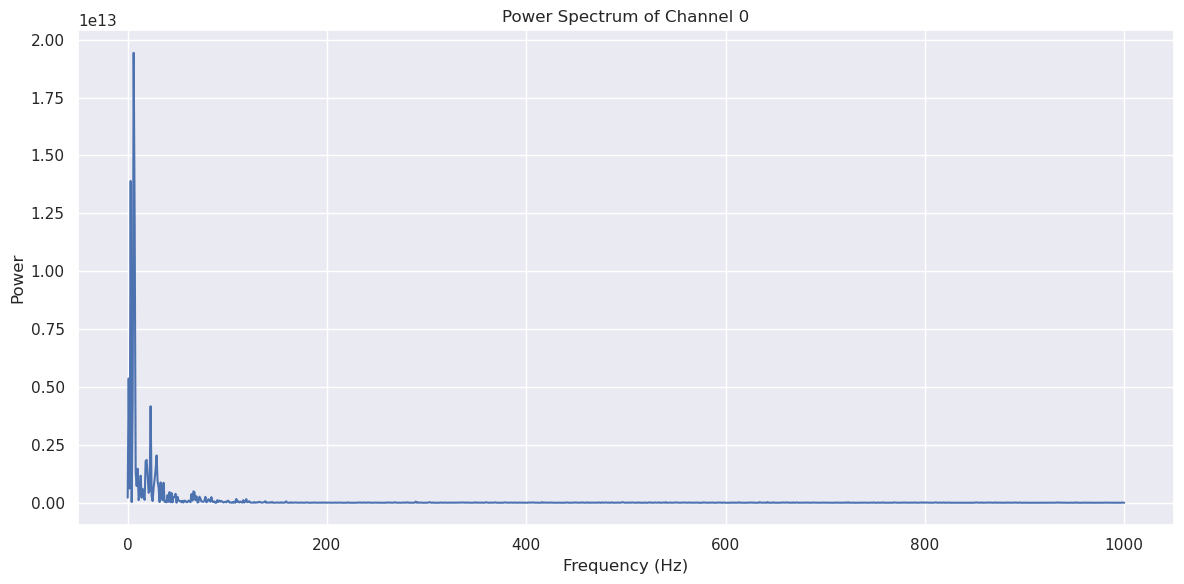

In [14]:
# Calculate and plot power spectrum for one channel
plt.figure(figsize=(12, 6))
channel_idx = 0  # First channel

# Calculate power spectrum using FFT
signal = raw_data_sample[:, channel_idx]
n = len(signal)
fft_result = np.fft.rfft(signal)
power = np.abs(fft_result)**2
freqs = np.fft.rfftfreq(n, 1/time_series.rate)

# Plot only up to 1000 Hz for better visibility
max_freq = 1000
freq_mask = freqs <= max_freq
plt.plot(freqs[freq_mask], power[freq_mask])
plt.title(f'Power Spectrum of Channel {selected_channels[channel_idx]}')
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.grid(True)
plt.tight_layout()
plt.show()

The power spectrum shows strong low-frequency components (below 50 Hz), which includes frequencies in the theta (4-8 Hz), alpha (8-12 Hz), and beta (15-30 Hz) ranges. This is consistent with hippocampal and cortical activity during active behaviors like the running task in this experiment.

Let's analyze how the signals vary across different channels at a single timepoint:

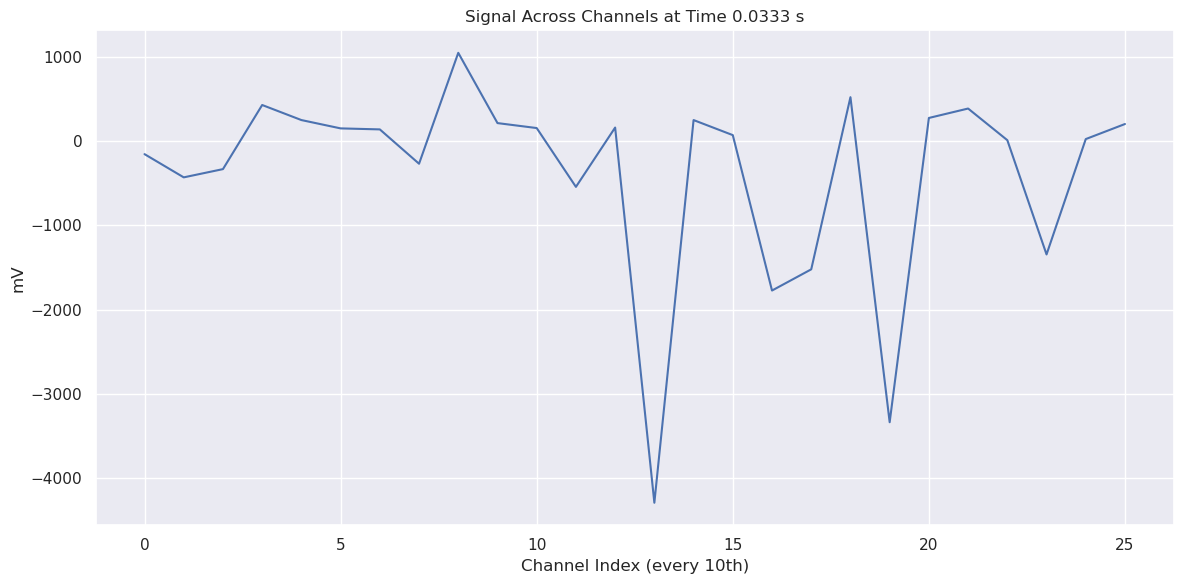

In [15]:
# Plot the channels across a single timepoint to see the spatial pattern
plt.figure(figsize=(12, 6))
time_idx = 1000  # Choose a specific timepoint
channels = range(0, time_series.data.shape[1], 10)  # Take every 10th channel for clarity
values = []

# Get the values for the selected channels
for ch in channels:
    values.append(time_series.data[time_idx, ch])

plt.plot(range(len(values)), values)
plt.title(f'Signal Across Channels at Time {time_idx/time_series.rate:.4f} s')
plt.xlabel('Channel Index (every 10th)')
plt.ylabel(time_series.unit)
plt.grid(True)
plt.tight_layout()
plt.show()

This spatial pattern across channels gives us insight into how the electrical field varies across the recording sites, potentially reflecting the underlying neural activity sources.

## Summary and Conclusions

In this notebook, we've explored Dandiset 001375, which contains electrophysiological recordings from mice with DREADD-mediated disruption of septal GABAergic activity.

Key findings from our exploration:

1. **Dataset Structure**: The dataset contains recordings from two subjects (MS13B and MS14A) with silicon probe recordings from hippocampus and visual/parietal cortex.

2. **Trial Information**: The experimental sessions consisted of ~387-716 trials (laps in a virtual hallway), with most trials lasting about 7-12 seconds. The trials occurred in rapid succession with minimal inter-trial intervals.

3. **Neural Activity**: 
   - Single unit recordings show a diverse range of firing rates (0.5 Hz to >50 Hz)
   - Units display varied firing patterns, with some showing regular activity and others being more sparse
   - The raw data contains prominent low-frequency oscillations that are likely relevant to hippocampal function

4. **Technical Details**:
   - The recordings used a 256-channel setup (2 shanks with 128 channels each)
   - Data was sampled at 30 kHz, resulting in high temporal resolution
   - The recording sessions lasted approximately 80 minutes

This dataset offers a valuable resource for investigating how septal GABAergic activity influences hippocampal and neocortical dynamics. Researchers interested in septohippocampal circuits, theta oscillations, and spatial navigation would find this data particularly useful.

## Future Directions

Some potential analyses that could be performed with this dataset:

1. **Oscillatory Analysis**: More detailed analysis of oscillations (theta, gamma) and their relationship to behavior
2. **Correlation Analysis**: Examining functional connectivity between different brain regions
3. **Behavioral Correlates**: Relating neural activity patterns to specific behavioral events or performance
4. **Comparison Between Conditions**: Analyzing differences in neural activity with and without DREADD activation
5. **Phase-Amplitude Coupling**: Investigating the relationship between different frequency bands

This notebook provides a starting point for working with this dataset, and the code can be adapted for more specific analyses based on research interests.

In [16]:
# Close the file
h5_file.close()